# Lecture Preprocessing

## Imports

In [13]:
from pdf2image import convert_from_path
from PIL import Image
import matplotlib.pyplot as plt
import openai
import fitz  # PyMuPDF
import io

import base64
import requests
from io import BytesIO

from langdetect import detect
import PyPDF2
from tqdm import tqdm
import configparser
from openai import OpenAI

## Key and path variables



In [14]:
# OpenAI API Key
config = configparser.ConfigParser()
config.read('./config.ini')
api_key = config['openai']['api_key']

In [28]:

# Pfad zur PDF-Datei
pdf_path = 'C:/Users/a829727/OneDrive - Atos/Dokumente/Uni/Semester 5/NLP/Vorlesungen/Kommunikations_und_Betriebssysteme.pdf'



# Picture control

Seite: 431


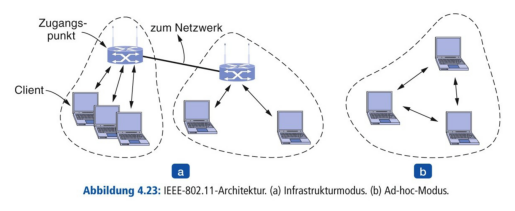

Seite: 433


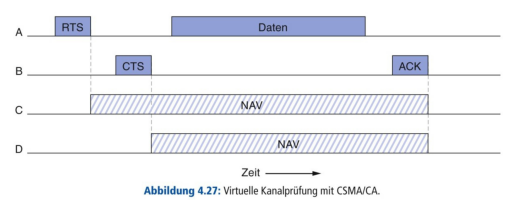

Seite: 435


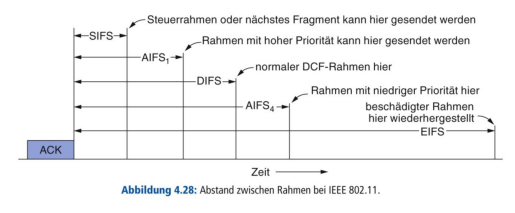

Seite: 438


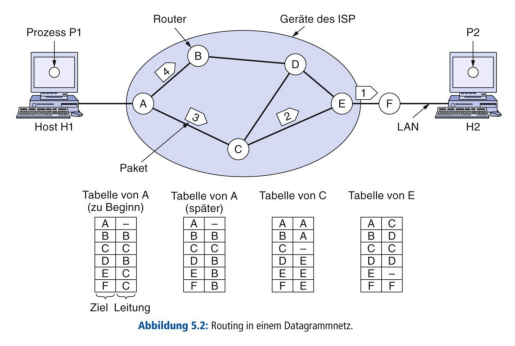

Seite: 439


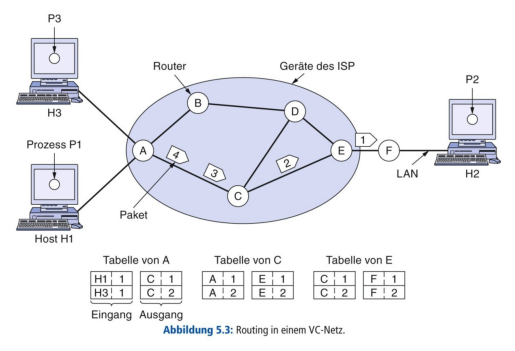

Seite: 440


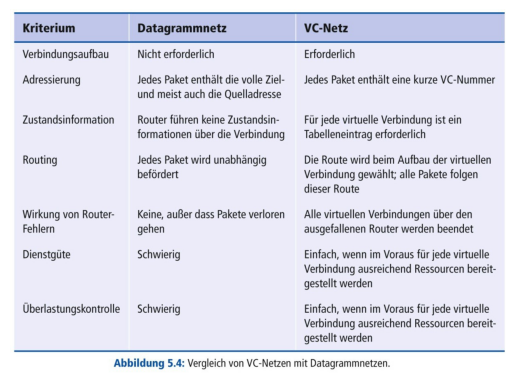

Seite: 441


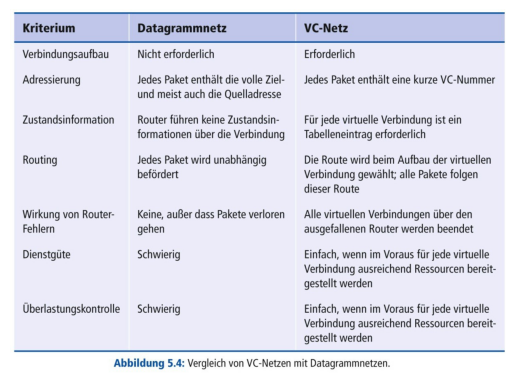

Seite: 446


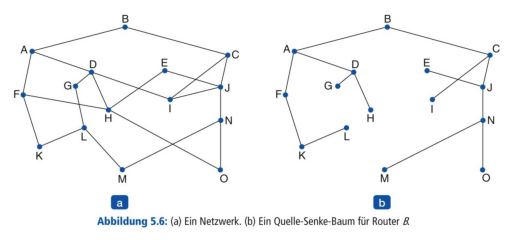

Seite: 452


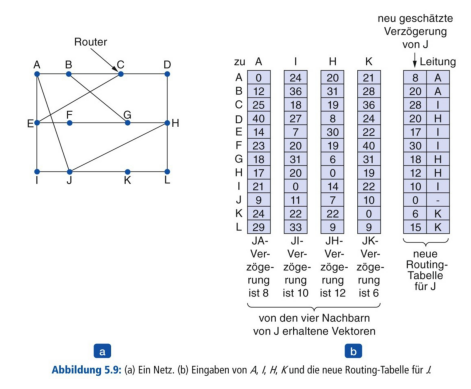

Seite: 453


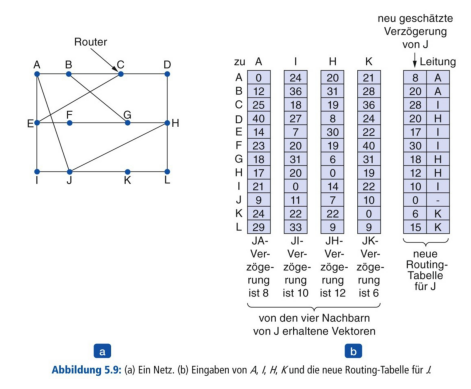

Seite: 455


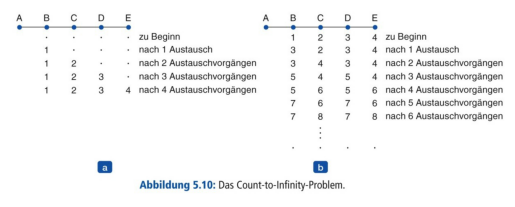

Seite: 457


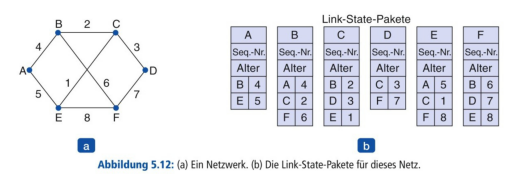

Seite: 458


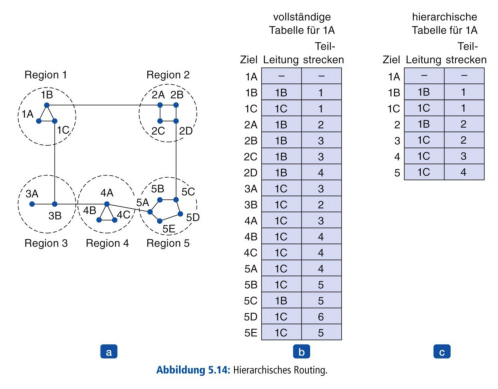

Seite: 463


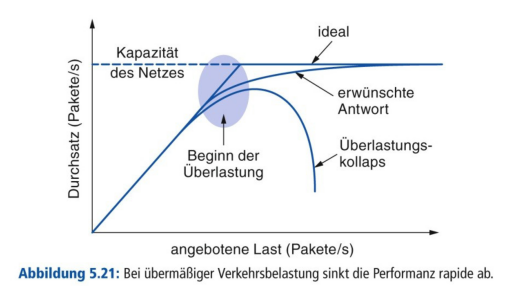

Seite: 464


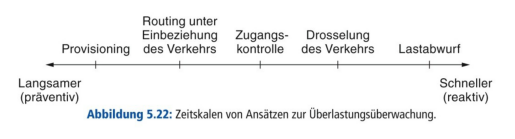

Seite: 474


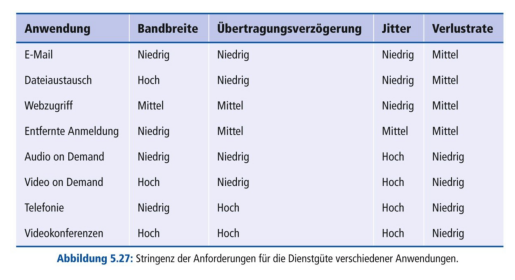

Seite: 478


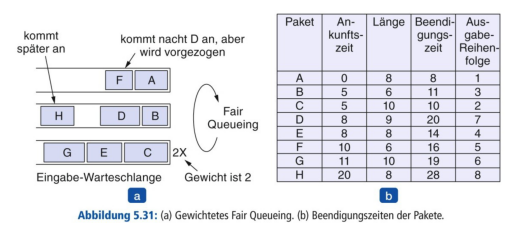

Seite: 479


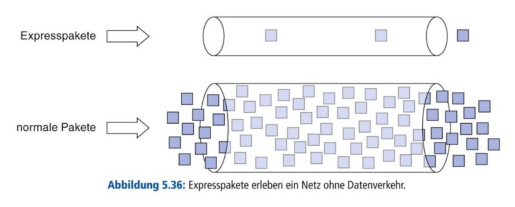

Seite: 482


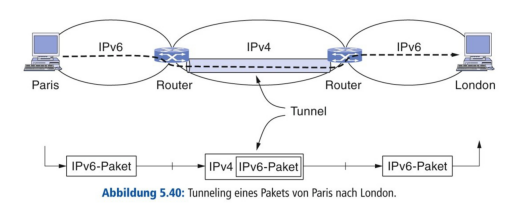

Seite: 484


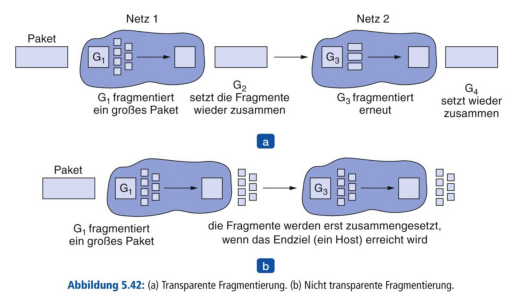

Seite: 485


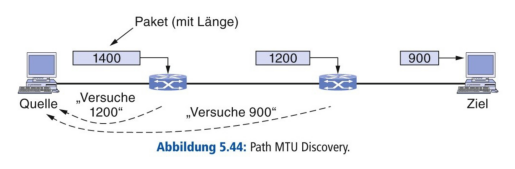

Seite: 487


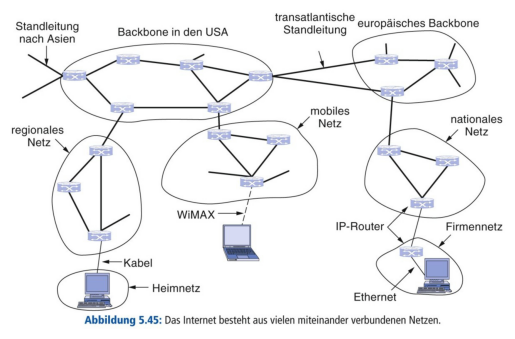

Seite: 488


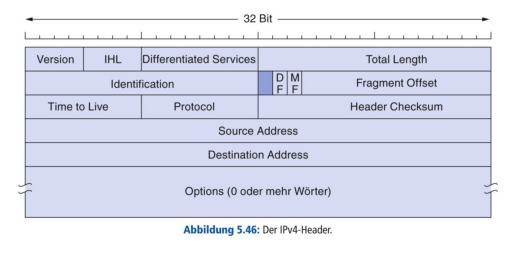

Seite: 489


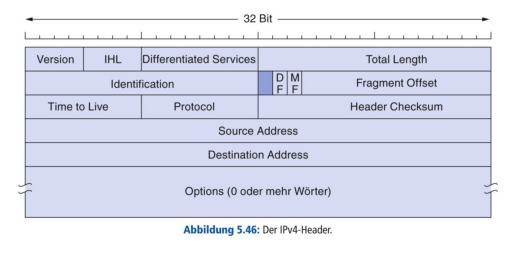

Seite: 490


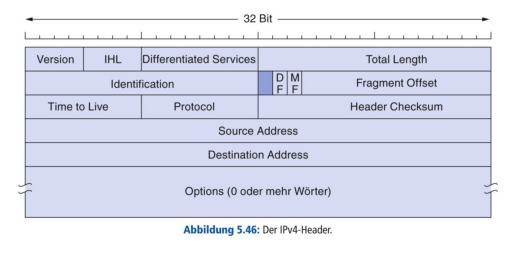

Seite: 491


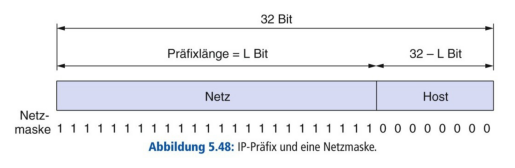

Seite: 492


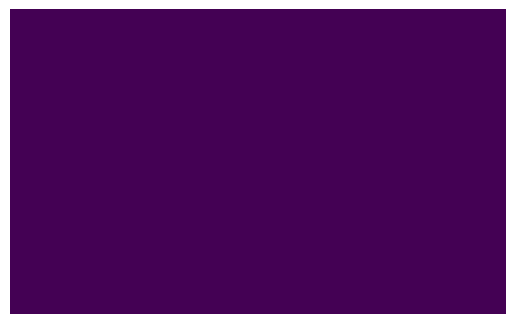

Seite: 492


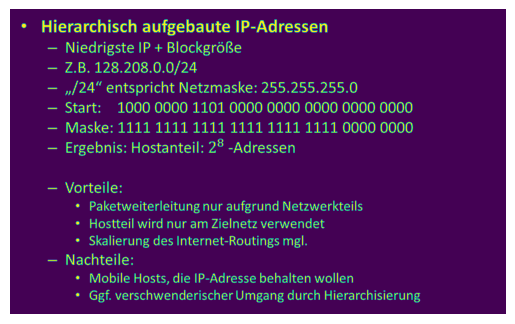

Seite: 494


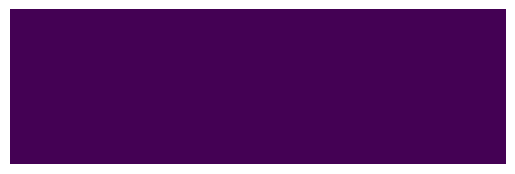

Seite: 494


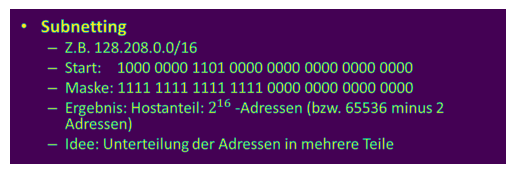

Seite: 494


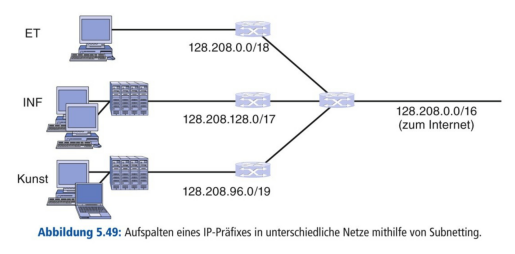

Seite: 495


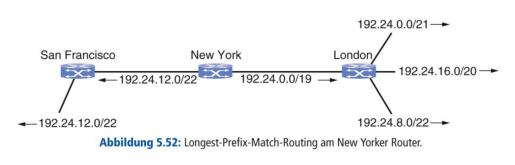

Seite: 496


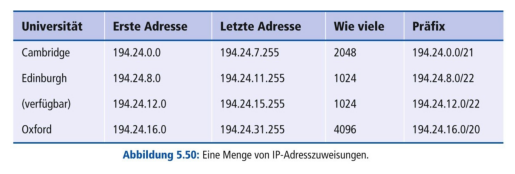

Seite: 496


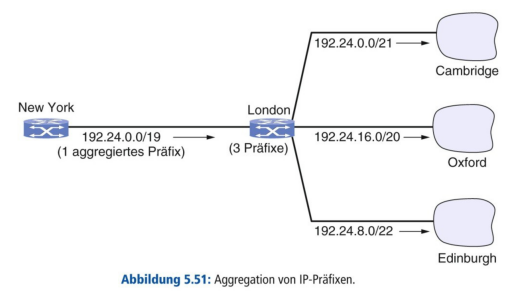

Seite: 497


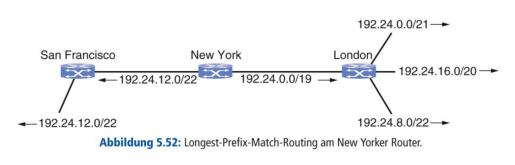

Seite: 498


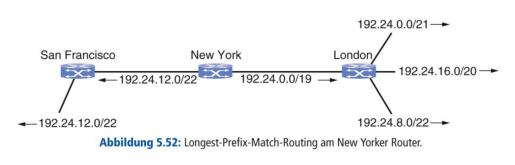

Seite: 499


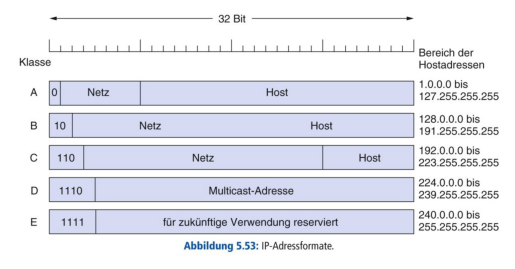

Seite: 500


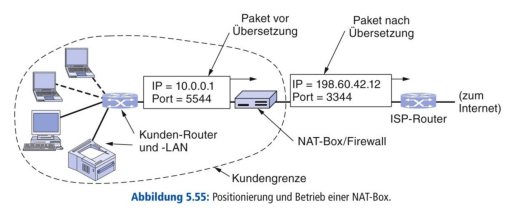

Seite: 501


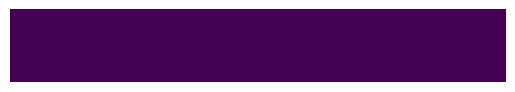

Seite: 501


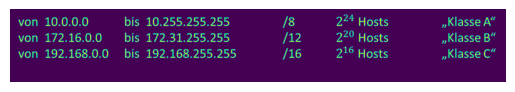

Seite: 505


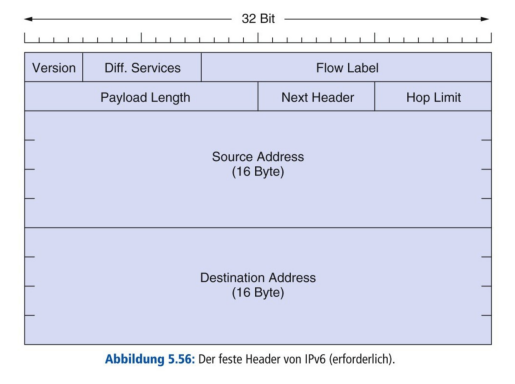

Seite: 506


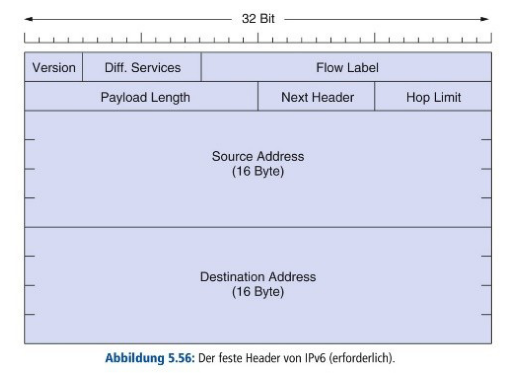

Seite: 511


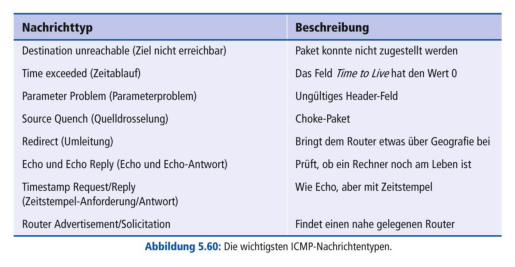

Seite: 521


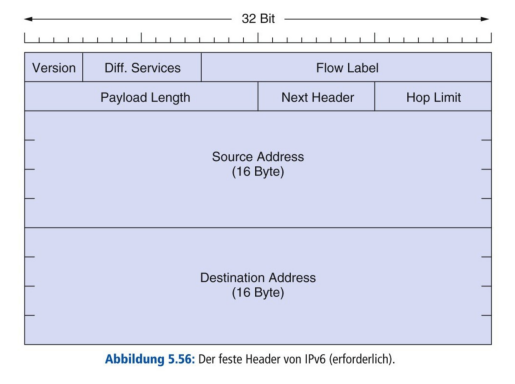

Seite: 522


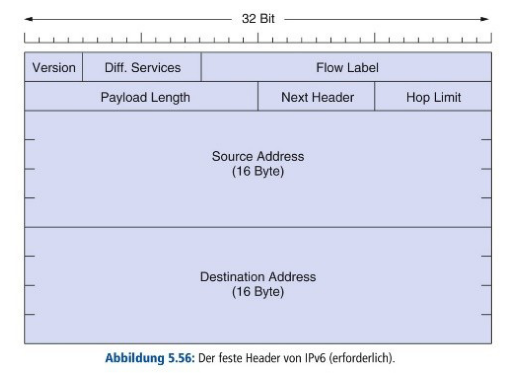

Seite: 527


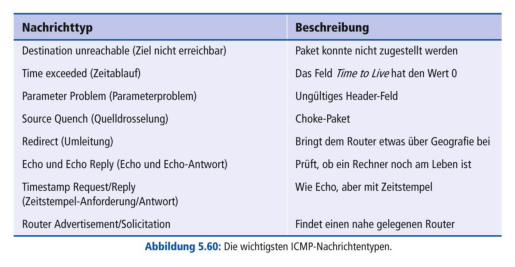

Seite: 538


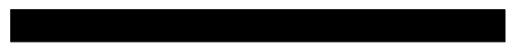

Seite: 538


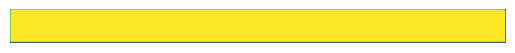

Seite: 538


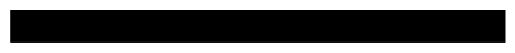

Seite: 538


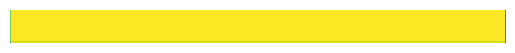

Seite: 538


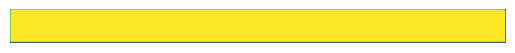

Seite: 538


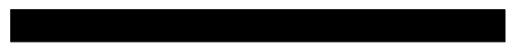

Seite: 538


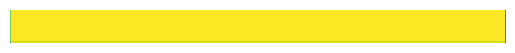

Seite: 538


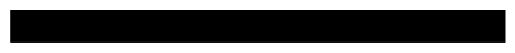

Seite: 539


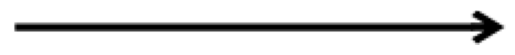

Seite: 539


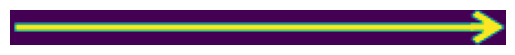

Seite: 539


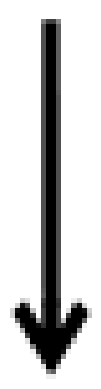

Seite: 539


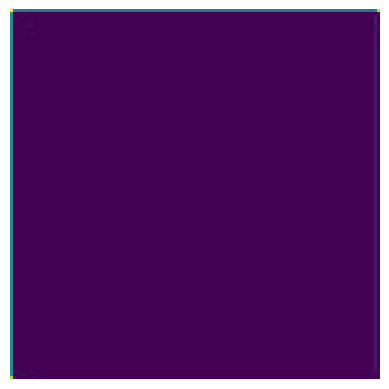

Seite: 539


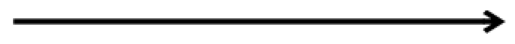

Seite: 539


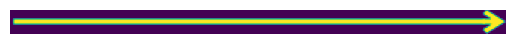

Seite: 539


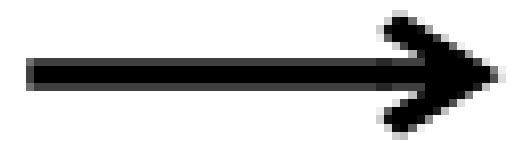

Seite: 539


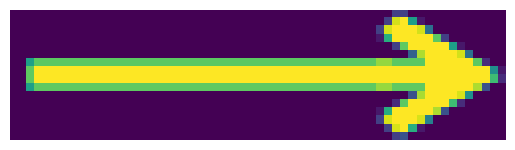

Seite: 539


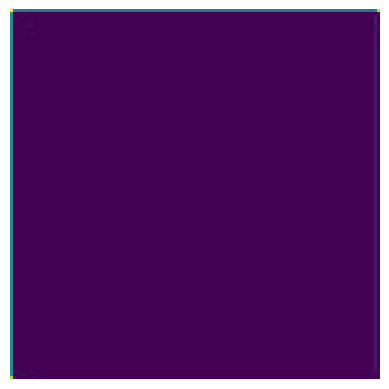

Seite: 539


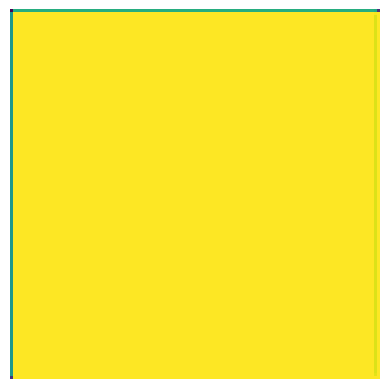

Seite: 539


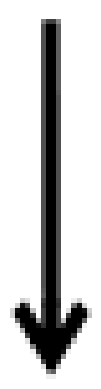

Seite: 539


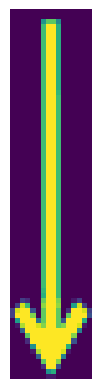

Seite: 539


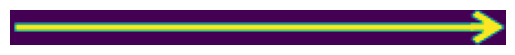

Seite: 539


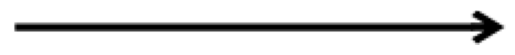

Seite: 539


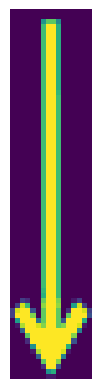

Seite: 539


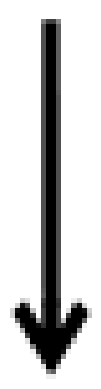

Seite: 539


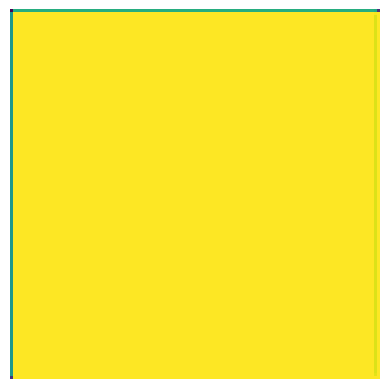

Seite: 539


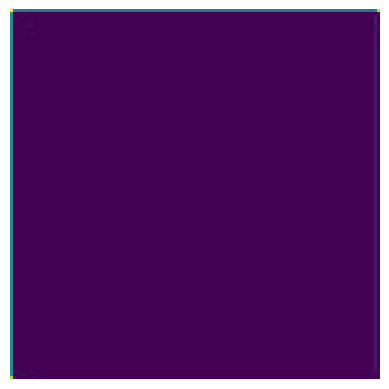

Seite: 539


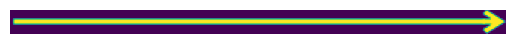

Seite: 539


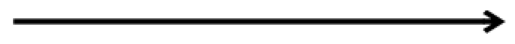

Seite: 539


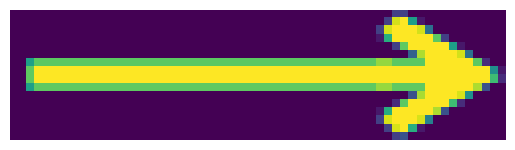

Seite: 539


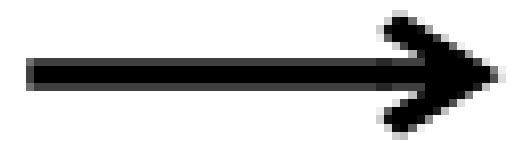

Seite: 539


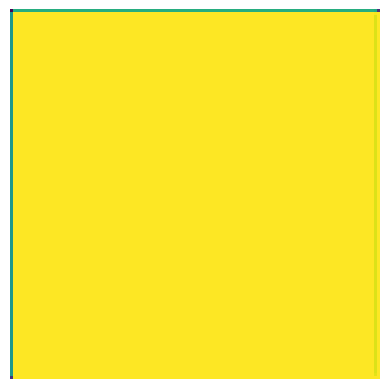

Seite: 539


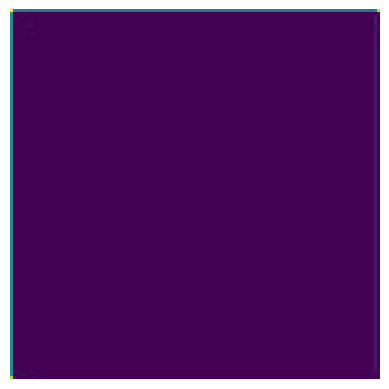

Seite: 539


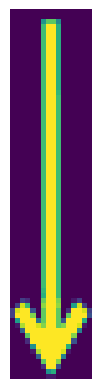

Seite: 539


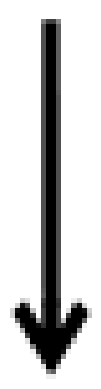

Seite: 555


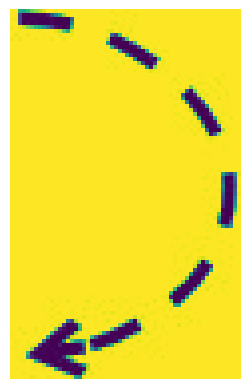

Seite: 555


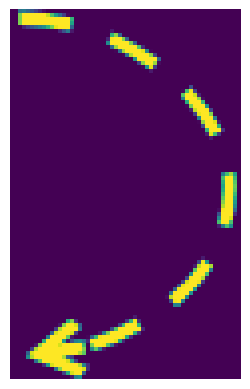

Seite: 555


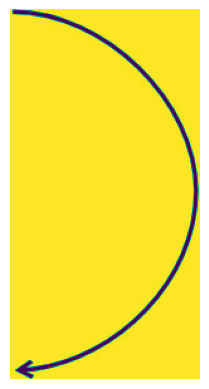

Seite: 555


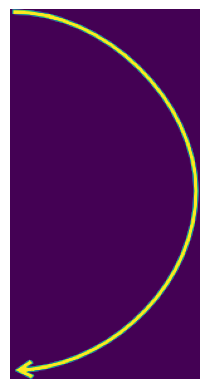

Seite: 555


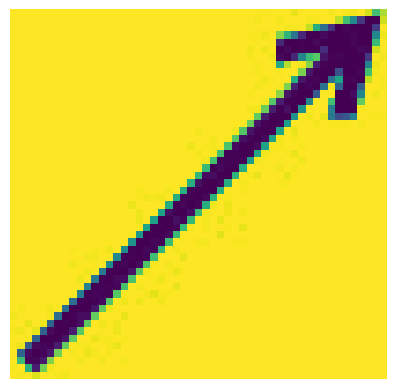

Seite: 555


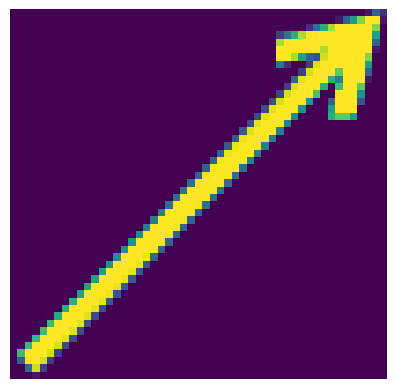

Seite: 555


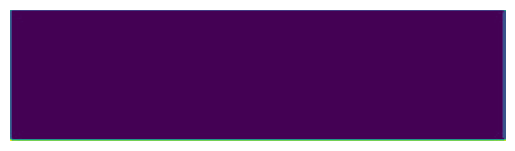

Seite: 555


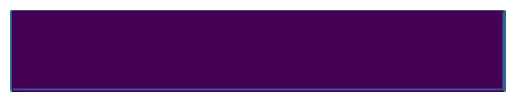

Seite: 555


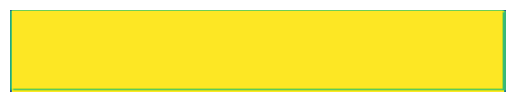

Seite: 555


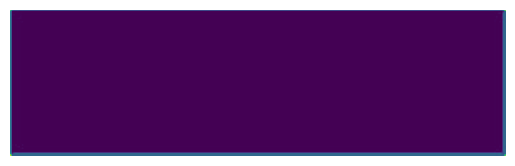

Seite: 555


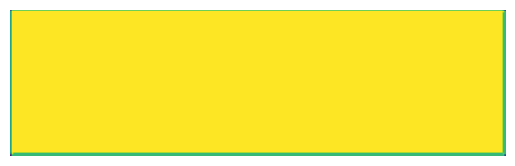

Seite: 555


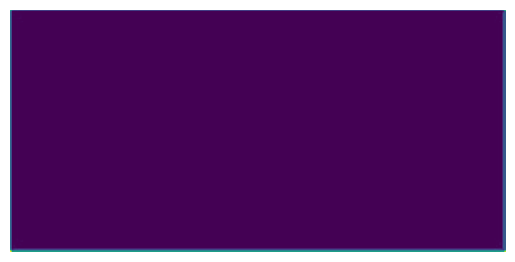

Seite: 555


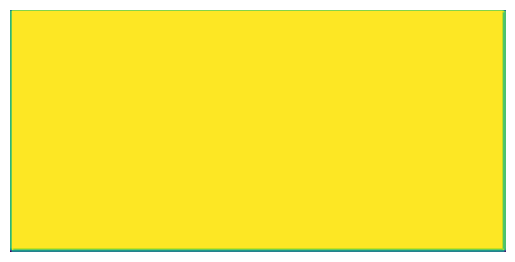

Seite: 555


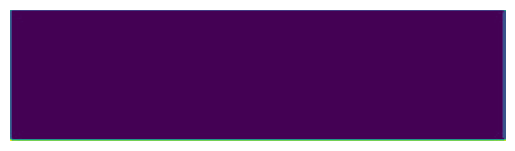

Seite: 555


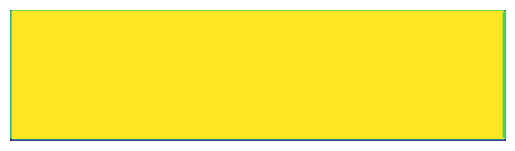

Seite: 555


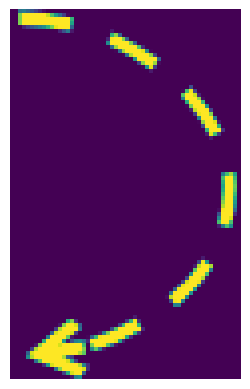

Seite: 555


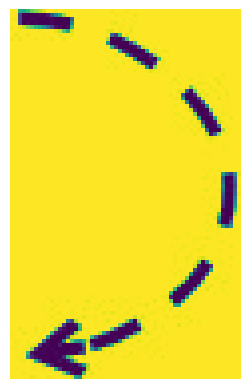

Seite: 555


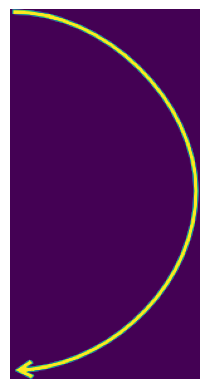

Seite: 555


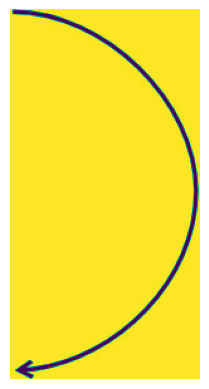

Seite: 555


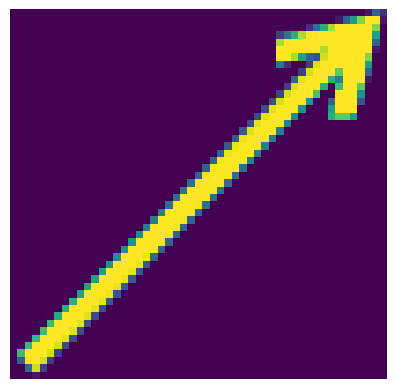

Seite: 555


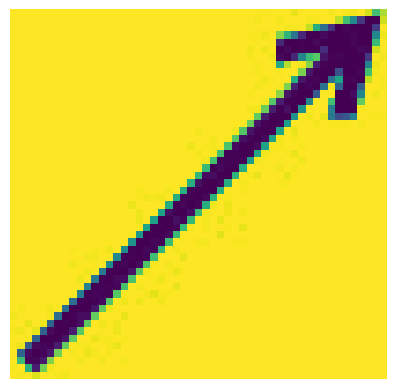

Seite: 555


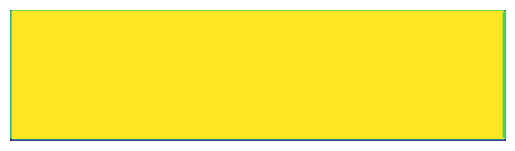

Seite: 555


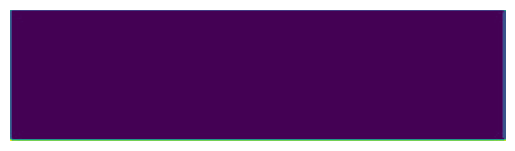

Seite: 555


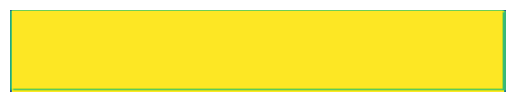

Seite: 555


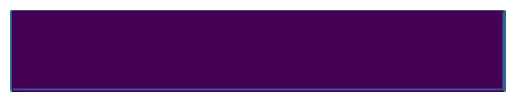

Seite: 555


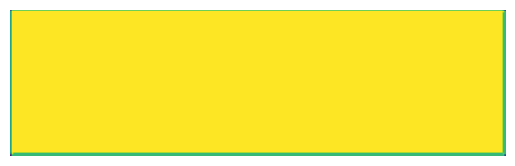

Seite: 555


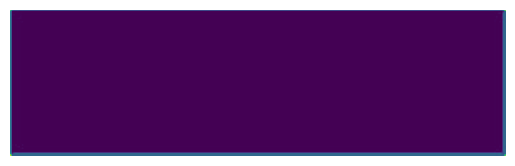

Seite: 555


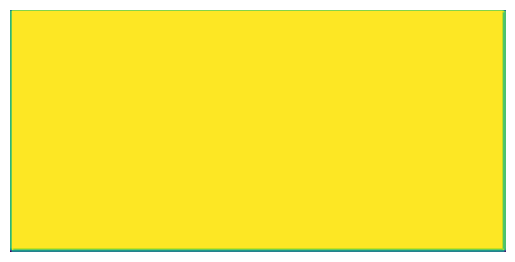

Seite: 555


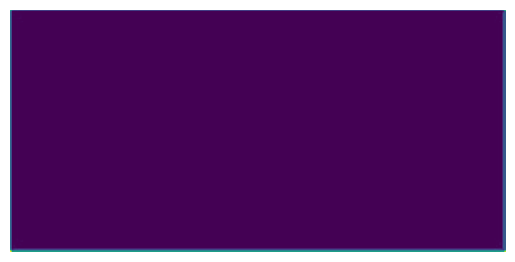

Seite: 555


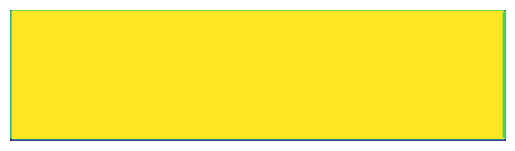

Seite: 555


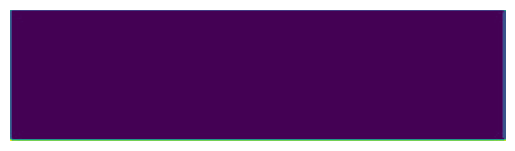

In [29]:
def extract_and_plot_images(pdf_path):
    # PDF-Dokument öffnen
    doc = fitz.open(pdf_path)
    # Ermittle die Anzahl der Seiten
    num_pages = len(doc)
    images=[]
    pages=[]
    # Durch jede Seite des PDFs gehen
    for i in range(428,len(doc)):
        page = doc.load_page(i)

        # Bilder auf der Seite extrahieren
        for img in page.get_images(full=True):
            xref = img[0]
            base_image = doc.extract_image(xref)
            image_bytes = base_image["image"]

            # Bild mit PIL verarbeiten
            image = Image.open(io.BytesIO(image_bytes))
            images.append(image)
            # Bild anzeigen
            plt.imshow(image)
            print(f"Seite: {i+1}")
            pages.append(i+1)
            plt.axis('off')
            plt.show()
    pages = list(set(pages))
    doc.close()
    return images,pages,num_pages
    	
images,pages,num_pages = extract_and_plot_images(pdf_path)

## Funktions

In [32]:
pages.sort()

In [34]:
pages =[431,
 433,
 435,
 438,
 439,
 440,
 441,
 446,
 452,
 453,
 455,
 457,
 458,
 463,
 464,
 474,
 478,
 479,
 482,
 484,
 485,
 487,
 488,
 489,
 490,
 491,
 492,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 505,
 506,
 511,
 521,
 522,
 527]

### convert to base64

In [35]:
# Funktion, um das PIL-Bild zu kodieren
def encode_pil_image(pil_image):
    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

### Extracting the text

In [36]:
def extract_text_from_range(file_path, start_page, end_page):
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        extracted_text = ''

        # Anzahl der Seiten in der PDF-Datei bestimmen
        num_pages = len(pdf_reader.pages)

        # Überprüfung, ob die Seitenzahlen im gültigen Bereich liegen
        if start_page < 0 or end_page > num_pages or start_page > end_page:
            return "Ungültiger Seitenbereich."

        for page_number in tqdm(range(start_page, end_page), desc='Texextraktion'):
            page = pdf_reader.pages[page_number]
            page_text = page.extract_text()
            if page_text:
                extracted_text += page_text + '\n'
            else:
                extracted_text += f'Kein Text auf Seite {page_number + 1}\n'
        
    return extracted_text

### Extracting Images

In [37]:

def extract_images_from_pdf(file_path, page_number):
    print("Extrahiere Bilder...")
    images = convert_from_path(file_path, first_page=page_number, last_page=page_number)
    
    bild=images[0]
    if bild.size[0]>=600:
        skale=600
    else:
        skale=bild.size[0]
    # Neue Größe definieren 
    neue_groesse = (skale, int((bild.size[1]/bild.size[0])*skale))

    # Bild skalieren
    skaliertes_bild = bild.resize(neue_groesse)

    return skaliertes_bild

### Picture to text

In [38]:
# Getting the base64 string
def image_to_text(pil_image):
  print("Image to text")
  base64_image = encode_pil_image(pil_image)
  headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"
  }

  payload = {
    "model": "gpt-4-vision-preview",
    "messages": [
      {
        "role": "user",
        "content": [
          {
            "type": "text",
            "text": "Beschreibe den inhalt des Bildes?"
          },
          {
            "type": "image_url",
            "image_url": {
              "url": f"data:image/jpeg;base64,{base64_image}"
            }
          }
        ]
      }
    ],
    "max_tokens": 300
  }

  response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

  return response.json()['choices'][0]['message']['content']

### Final pipeline

In [39]:
def pre_process_pipeline(file_path, pages, num_pages):
    final_text = ''
    page_old = 0

    # Initialize the tqdm progress bar
    for page in tqdm(pages, desc='Processing Pages'):
        liste = list(range(num_pages))[page_old:page]
        if page_old != page + 1:
            text = extract_text_from_range(file_path, liste[0], liste[-1])
            final_text += text
        image = extract_images_from_pdf(file_path, page)
        img_text = image_to_text(image)
        final_text += f'Bild:{img_text}'
        page_old = page
        if page == pages[-1] and page != num_pages:
            text = extract_text_from_range(file_path, page+1, num_pages)
            final_text += text

    return final_text

## Final Preprocessing

In [40]:
text = pre_process_pipeline(pdf_path,pages,num_pages)

Texextraktion: 100%|██████████| 430/430 [00:06<00:00, 67.23it/s] 


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 1/1 [00:00<00:00, 55.56it/s]/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 1/1 [00:00<00:00, 56.00it/s]/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 2/2 [00:00<00:00, 119.57it/s]it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 4/41 [00:44<06:24, 10.40s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 5/41 [00:51<05:36,  9.35s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 6/41 [00:58<04:55,  8.45s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 4/4 [00:00<00:00, 108.78it/s]it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 5/5 [00:00<00:00, 91.68it/s]/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 9/41 [01:26<04:55,  9.23s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 1/1 [00:00<00:00, 95.10it/s]s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 1/1 [00:00<00:00, 90.83it/s]s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 12/41 [01:50<04:03,  8.38s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 4/4 [00:00<00:00, 129.04it/s]/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 14/41 [02:06<03:35,  7.97s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 9/9 [00:00<00:00, 136.72it/s]/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 3/3 [00:00<00:00, 92.96it/s]s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 17/41 [02:44<04:45, 11.88s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 2/2 [00:00<00:00, 138.78it/s]/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 1/1 [00:00<00:00, 125.28it/s]/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 20/41 [03:06<03:11,  9.13s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 1/1 [00:00<00:00, 124.83it/s]/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 22/41 [03:22<02:42,  8.53s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 23/41 [03:30<02:30,  8.35s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 24/41 [03:40<02:31,  8.91s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 25/41 [03:48<02:15,  8.48s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 26/41 [04:03<02:37, 10.51s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 1/1 [00:00<00:00, 52.65it/s]s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 28/41 [04:22<02:11, 10.08s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 29/41 [04:32<02:02, 10.25s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 30/41 [04:40<01:44,  9.50s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 31/41 [04:48<01:28,  8.89s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 32/41 [04:57<01:21,  9.11s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 33/41 [05:05<01:10,  8.82s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 34/41 [05:19<01:11, 10.28s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 3/3 [00:00<00:00, 93.88it/s]s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 36/41 [05:36<00:45,  9.16s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 4/4 [00:00<00:00, 92.68it/s]s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 9/9 [00:00<00:00, 98.54it/s]s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 0it [00:00, ?it/s]| 39/41 [06:06<00:19,  9.74s/it]


Extrahiere Bilder...
Image to text


Texextraktion: 100%|██████████| 4/4 [00:00<00:00, 102.57it/s]/it]


Extrahiere Bilder...
Image to text


Processing Pages: 100%|██████████| 41/41 [06:22<00:00,  9.33s/it]


# Save data

In [27]:
# save the preprocessed lecture text
with open('./Betriebsysteme.txt', 'w') as file:
    file.write(text)

## Translation to English

In [ ]:
# Öffnen der Datei im Lesemodus
with open('./VL.txt', 'r') as file:
    # Lesen des gesamten Inhalts der Datei
    content = file.read()

# Anzeigen des Inhalts
print(content)


In [ ]:
def chat_with_gpt(prompt):
    client = OpenAI(api_key=api_key,)

    chat_completion = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": prompt,
            }
        ],
        model="gpt-3.5-turbo",
    )
    return chat_completion.choices[0].message.content
# Beispielverwendung
prompt = "Überstze den folgenden Text Sinngemäß ins Englische:"+"Hallo wie gehts dir?"
response = chat_with_gpt(prompt)
print(response)

In [ ]:
with open('./VL_en.txt', 'w') as file:
    file.write(response)